In [284]:
import pandas as pd
import pymssql
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
from matplotlib import pyplot as plt

In [285]:
from config import database
from config import Mouse
from config import Virus
from config import Protein
from config import Biotin
from config import Fraction
from config import Protein_Id
from config import Gene
from config import Protein_Description
from config import Peptide
from config import username
from config import password
from config import server

# Create df with all protein names

In [286]:
try:
    conn = pymssql.connect(server,username, password,database)

    cursor = conn.cursor()
    query = f"""
    SELECT 
        P.Protein_Name,
        V.Virus_Label,
        B.Biotin_Label,
        F.Fraction_Label,
        SUM(MP.Hits) AS Hits
        FROM Mouse_Protein AS MP 
    INNER JOIN {Mouse} AS M on MP.Mouse_ID = M.Mouse_ID
    INNER JOIN {Protein} AS P on MP.Protein_ID = P.Protein_ID
    INNER JOIN {Virus} AS V on M.Virus_ID = V.Virus_ID
    INNER JOIN {Biotin} AS B on M.Biotin_ID = B.Biotin_ID
    INNER JOIN {Fraction} AS F on M.Fraction_ID = F.Fraction_ID
    INNER JOIN {Protein_Id} AS PI on P.Protein_Id_ID = PI.Protein_Id_ID
    INNER JOIN {Gene} AS G on P.Gene_ID = G.Gene_ID
    INNER JOIN {Protein_Description} AS PD on P.Description_ID = PD.Description_ID
    INNER JOIN {Peptide} AS PE on P.Peptide_ID = PE.Peptide_ID
    GROUP BY P.Protein_Name, V.Virus_Label,B.Biotin_Label,F.Fraction_Label
    ORDER BY Hits DESC
    """
    main_df = pd.read_sql(query, conn)
except Exception as e:
    print(e)
main_df.head()

,Protein_Name,Virus_Label,Biotin_Label,Fraction_Label,Hits
0,NFH_MOUSE,TDP43-TurboID,72,LP1,5.225510e+09
1,NFL_MOUSE,TDP43-TurboID,72,LP1,4.174620e+09
2,H2A1B_MOUSE;H2A1C_MOUSE;H2A1D_MOUSE;H2A1E_MOUS...,TDP43-TurboID,72,LP1,3.127040e+09
3,TBA1A_MOUSE,TDP43-TurboID,72,LP1,3.018330e+09
4,PLEC-6_MOUSE;PLEC-7_MOUSE;PLEC-8_MOUSE,TDP43-TurboID,72,LP1,2.856640e+09


# Create different dfs for each Virus, Biotin, Fraction combo

In [287]:
print("Virus types:", list(main_df["Virus_Label"].unique()))
print("Biotin types:", list(main_df["Biotin_Label"].unique()))
print("Fraction types:", list(main_df["Fraction_Label"].unique()))
print("Total rows of data:", len(main_df), "\nWith 24 data frame combos")

Virus types: ['TDP43-TurboID', 'TurboID']
Biotin types: ['72', '1.5', 'saline']
Fraction types: ['LP1', 'whole brain', 'LS1', 'Nuclear']
Total rows of data: 76479 
With 24 data frame combos


In [288]:
# Virus type _ Biotin type _ Fraction Type  =  labeling scheme for dfs

# TurboID virus & 72 Biotin combonations
TurboID_72_LP1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LP1"]
TurboID_72_wholebrain = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]
TurboID_72_LS1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LS1"]
TurboID_72_Nuclear = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "Nuclear"]

# TurboID virus & 1.5 Biotin combonations
TurboID_15_LP1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LP1"]
TurboID_15_wholebrain = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "whole brain"]
TurboID_15_LS1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LS1"]
TurboID_15_Nuclear = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "Nuclear"]

# TurboID virus & saline Biotin combonations
TurboID_saline_LP1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "LP1"]
TurboID_saline_wholebrain = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "whole brain"]
TurboID_saline_LS1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "LS1"]
TurboID_saline_Nuclear = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "Nuclear"]

# TDP43-TurboID virus & 72 Biotin combonations
TDP43TurboID_72_LP1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LP1"]
TDP43TurboID_72_wholebrain = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]
TDP43TurboID_72_LS1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LS1"]
TDP43TurboID_72_Nuclear = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "Nuclear"]

# TDP43-TurboID virus & 1.5 Biotin combonations
TDP43TurboID_15_LP1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LP1"]
TDP43TurboID_15_wholebrain = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "whole brain"]
TDP43TurboID_15_LS1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "LS1"]
TDP43TurboID_15_Nuclear = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "1.5"][main_df["Fraction_Label"] == "Nuclear"]

# TDP43-TurboID virus & saline Biotin combonations
TDP43TurboID_saline_LP1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "LP1"]
TDP43TurboID_saline_wholebrain = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "whole brain"]
TDP43TurboID_saline_LS1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "LS1"]
TDP43TurboID_saline_Nuclear = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "Nuclear"]

# Total amount of row captured check, should get a total of zero
print("Should be zero:", len(main_df) - (len(TurboID_72_LP1) + len(TurboID_72_wholebrain) + len(TurboID_72_LS1) + len(TurboID_72_Nuclear)
                    + len(TurboID_15_LP1) + len(TurboID_15_wholebrain) + len(TurboID_15_LS1) + len(TurboID_15_Nuclear)
                    + len(TurboID_saline_LP1) + len(TurboID_saline_wholebrain) + len(TurboID_saline_LS1) + len(TurboID_saline_Nuclear)
                    
                    + len(TDP43TurboID_72_LP1) + len(TDP43TurboID_72_wholebrain) + len(TDP43TurboID_72_LS1) + len(TDP43TurboID_72_Nuclear)
                    + len(TDP43TurboID_15_LP1) + len(TDP43TurboID_15_wholebrain) + len(TDP43TurboID_15_LS1) + len(TDP43TurboID_15_Nuclear)
                    + len(TDP43TurboID_saline_LP1) + len(TDP43TurboID_saline_wholebrain) + len(TDP43TurboID_saline_LS1) + len(TDP43TurboID_saline_Nuclear)))

C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_19452\1740437975.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TurboID_72_LP1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LP1"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_19452\1740437975.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TurboID_72_wholebrain = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "whole brain"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_19452\1740437975.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TurboID_72_LS1 = main_df[main_df["Virus_Label"] == "TurboID"][main_df["Biotin_Label"] == "72"][main_df["Fraction_Label"] == "LS1"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_19452\1740437975.py:7: UserWarning: Boolean Series key will be reindexed to match DataFra

Should be zero: 0


C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_19452\1740437975.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_saline_LS1 = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "LS1"]
C:\Users\Adam Brewer\AppData\Local\Temp\ipykernel_19452\1740437975.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TDP43TurboID_saline_Nuclear = main_df[main_df["Virus_Label"] == "TDP43-TurboID"][main_df["Biotin_Label"] == "saline"][main_df["Fraction_Label"] == "Nuclear"]


# Visuals
### If 0 appears in a Venn Diagram, that means zero protiens occured that had hits great than 0

854 2928 25


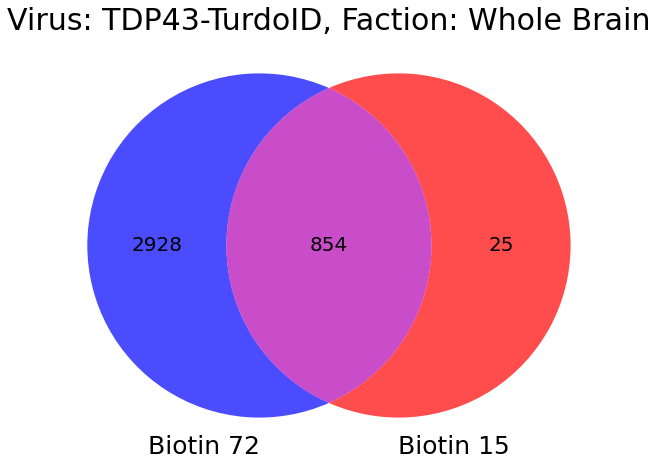

In [292]:
# Venn Diagram Biotin types
# TDP43TurboID_15_wholebrain, TDP43TurboID_72_wholebrain

TDP43TurboID_72_wholebrain_list = TDP43TurboID_72_wholebrain[TDP43TurboID_72_wholebrain["Hits"] != 0]["Protein_Name"].copy().to_list()
TDP43TurboID_15_wholebrain_list = TDP43TurboID_15_wholebrain[TDP43TurboID_15_wholebrain["Hits"] != 0]["Protein_Name"].copy().to_list()
union_list = TDP43TurboID_15_wholebrain_list + TDP43TurboID_72_wholebrain_list

union_list = set([x for x in union_list if union_list.count(x) > 1])
TDP43TurboID_72_wholebrain_list = set([x for x in TDP43TurboID_72_wholebrain_list if x not in union_list])
TDP43TurboID_15_wholebrain_list = set([x for x in TDP43TurboID_15_wholebrain_list if x not in union_list])
print(len(union_list), len(TDP43TurboID_72_wholebrain_list), len(TDP43TurboID_15_wholebrain_list))

plt.figure(figsize=(10,12), facecolor='white') 
plt.title("Virus: TDP43-TurdoID, Faction: Whole Brain", size = 30)
ax = plt.gca()
vd = venn2_unweighted(subsets = (len(TDP43TurboID_72_wholebrain_list), len(TDP43TurboID_15_wholebrain_list), len(union_list)), set_colors=("blue","red"), set_labels = ('Biotin 72', 'Biotin 15'), alpha = 0.7)

for text in vd.set_labels:
   text.set_fontsize(25)

for text in vd.subset_labels:
   text.set_fontsize(20)

plt.show()


2077 1705 56


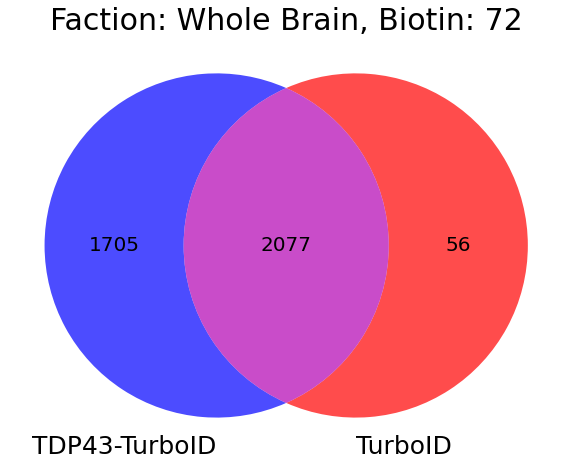

In [293]:
# Venn Diagram Biotin types
# TDP43TurboID_72_wholebrain, TurboID_72_wholebrain

TDP43TurboID_72_wholebrain_list = TDP43TurboID_72_wholebrain[TDP43TurboID_72_wholebrain["Hits"] != 0]["Protein_Name"].copy().to_list()
TurboID_72_wholebrain_list = TurboID_72_wholebrain[TurboID_72_wholebrain["Hits"] != 0]["Protein_Name"].copy().to_list()
union_list = TurboID_72_wholebrain_list + TDP43TurboID_72_wholebrain_list

union_list = set([x for x in union_list if union_list.count(x) > 1])
TDP43TurboID_72_wholebrain_list = set([x for x in TDP43TurboID_72_wholebrain_list if x not in union_list])
TurboID_72_wholebrain_list = set([x for x in TurboID_72_wholebrain_list if x not in union_list])
print(len(union_list), len(TDP43TurboID_72_wholebrain_list), len(TurboID_72_wholebrain_list))

plt.figure(figsize=(10,12), facecolor='white') 
plt.title("Faction: Whole Brain, Biotin: 72", size = 30)
ax = plt.gca()
vd = venn2_unweighted(subsets = (len(TDP43TurboID_72_wholebrain_list), len(TurboID_72_wholebrain_list), len(union_list)), set_colors=("blue","red"), set_labels = ('TDP43-TurboID', 'TurboID'), alpha = 0.7)

for text in vd.set_labels:
   text.set_fontsize(25)

for text in vd.subset_labels:
   text.set_fontsize(20)

plt.show()

0 4385 0


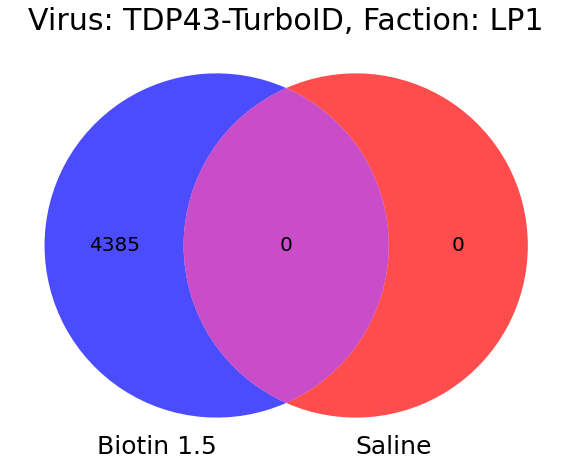

In [294]:
# Venn Diagram Biotin types
# TDP43TurboID_15_LP1, TurboID_saline_LP1

TDP43TurboID_15_LP1_list = TDP43TurboID_15_LP1[TDP43TurboID_15_LP1["Hits"] != 0]["Protein_Name"].copy().to_list()
TurboID_saline_LP1_list = TurboID_saline_LP1[TurboID_saline_LP1["Hits"] != 0]["Protein_Name"].copy().to_list()
union_list = TDP43TurboID_15_LP1_list + TurboID_saline_LP1_list

union_list = set([x for x in union_list if union_list.count(x) > 1])
TDP43TurboID_15_LP1_list = set([x for x in TDP43TurboID_15_LP1_list if x not in union_list])
TurboID_saline_LP1_list = set([x for x in TurboID_saline_LP1_list if x not in union_list])
print(len(union_list), len(TDP43TurboID_15_LP1_list), len(TurboID_saline_LP1_list))

plt.figure(figsize=(10,12), facecolor='white') 
plt.title("Virus: TDP43-TurboID, Faction: LP1", size = 30)
ax = plt.gca()
vd = venn2_unweighted(subsets = (len(TDP43TurboID_15_LP1_list), len(TurboID_saline_LP1_list), len(union_list)), set_colors=("blue","red"), set_labels = ('Biotin 1.5', 'Saline'), alpha = 0.7)

for text in vd.set_labels:
   text.set_fontsize(25)

for text in vd.subset_labels:
   text.set_fontsize(20)

plt.show()

0 4356 0


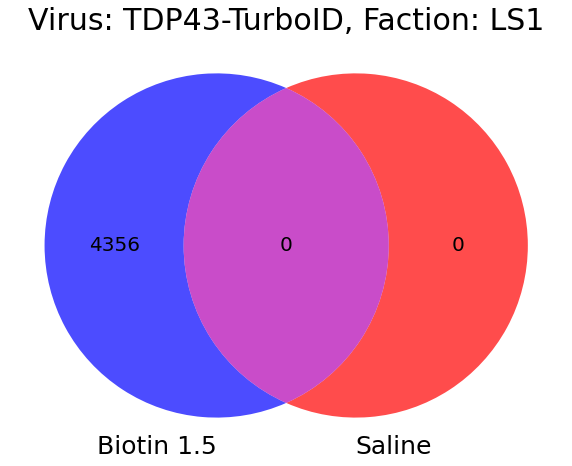

In [295]:
# Venn Diagram Biotin types
# TDP43TurboID_15_LS1, TurboID_saline_LS1

TDP43TurboID_15_LS1_list = TDP43TurboID_15_LS1[TDP43TurboID_15_LS1["Hits"] != 0]["Protein_Name"].copy().to_list()
TurboID_saline_LS1_list = TurboID_saline_LS1[TurboID_saline_LS1["Hits"] != 0]["Protein_Name"].copy().to_list()
union_list = TDP43TurboID_15_LS1_list + TurboID_saline_LS1_list

union_list = set([x for x in union_list if union_list.count(x) > 1])
TDP43TurboID_15_LS1_list = set([x for x in TDP43TurboID_15_LS1_list if x not in union_list])
TurboID_saline_LS1_list = set([x for x in TurboID_saline_LS1_list if x not in union_list])
print(len(union_list), len(TDP43TurboID_15_LS1_list), len(TurboID_saline_LS1_list))

plt.figure(figsize=(10,12), facecolor='white') 
plt.title("Virus: TDP43-TurboID, Faction: LS1", size = 30)
ax = plt.gca()
vd = venn2_unweighted(subsets = (len(TDP43TurboID_15_LS1_list), len(TurboID_saline_LS1_list), len(union_list)), set_colors=("blue","red"), set_labels = ('Biotin 1.5', 'Saline'), alpha = 0.7)

for text in vd.set_labels:
   text.set_fontsize(25)

for text in vd.subset_labels:
   text.set_fontsize(20)

plt.show()

4502
530 1904 15 7 116 1915 15


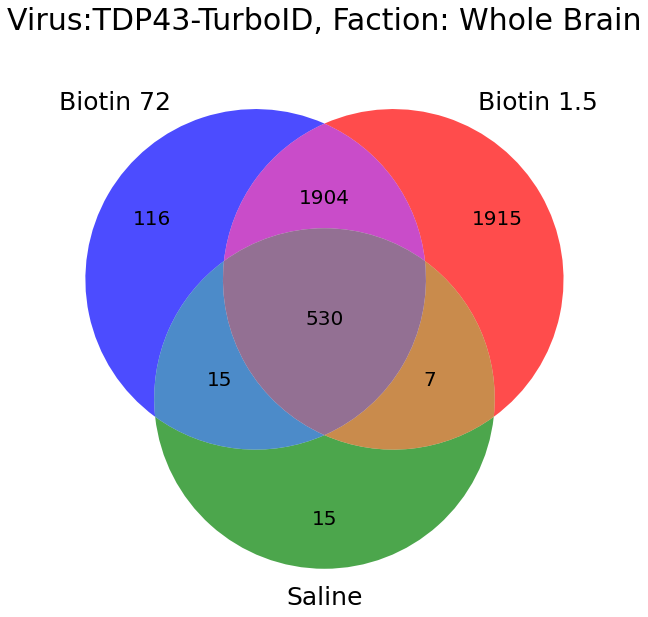

In [296]:
# Venn Diagram Biotin types
# TDP43TurboID_72_LS1, TDP43TurboID_15_LS1, TDP43TurboID_saline_LS1

TDP43TurboID_72_LS1_list = TDP43TurboID_72_LS1[TDP43TurboID_72_LS1["Hits"] != 0]["Protein_Name"].copy().to_list()
TDP43TurboID_15_LS1_list = TDP43TurboID_15_LS1[TDP43TurboID_15_LS1["Hits"] != 0]["Protein_Name"].copy().to_list()
TDP43TurboID_saline_LS1_list = TDP43TurboID_saline_LS1[TDP43TurboID_saline_LS1["Hits"] != 0]["Protein_Name"].copy().to_list()

print(len(set(TDP43TurboID_72_LS1_list + TDP43TurboID_15_LS1_list + TDP43TurboID_saline_LS1_list)))

union_list_72_15 = TDP43TurboID_72_LS1_list + TDP43TurboID_15_LS1_list
union_list_72_15 = list(set([x for x in union_list_72_15 if union_list_72_15.count(x) > 1]))

union_list_72_saline = TDP43TurboID_72_LS1_list + TDP43TurboID_saline_LS1_list
union_list_72_saline = list(set([x for x in union_list_72_saline if union_list_72_saline.count(x) > 1]))

union_list_15_saline = TDP43TurboID_15_LS1_list + TDP43TurboID_saline_LS1_list
union_list_15_saline = list(set([x for x in union_list_15_saline if union_list_15_saline.count(x) > 1]))

union_list = union_list_72_15 + union_list_72_saline + union_list_15_saline
union_list = list(set([x for x in union_list if union_list.count(x) > 1]))

union_list_72_15 = set([x for x in union_list_72_15 if x not in union_list])
union_list_72_saline = set([x for x in union_list_72_saline if x not in union_list])
union_list_15_saline = set([x for x in union_list_15_saline if x not in union_list])

TDP43TurboID_72_LS1_list = set([x for x in TDP43TurboID_72_LS1_list if x not in union_list and x not in union_list_72_15 and x not in union_list_72_saline])
TDP43TurboID_15_LS1_list = set([x for x in TDP43TurboID_15_LS1_list if x not in union_list and x not in union_list_72_15 and x not in union_list_15_saline])
TDP43TurboID_saline_LS1_list = set([x for x in TDP43TurboID_saline_LS1_list if x not in union_list and x not in union_list_15_saline and x not in union_list_72_saline])

print(len(union_list), len(union_list_72_15), len(union_list_72_saline), len(union_list_15_saline), len(TDP43TurboID_72_LS1_list), len(TDP43TurboID_15_LS1_list), len(TDP43TurboID_saline_LS1_list))

plt.figure(figsize=(10,12), facecolor='white') 
plt.title("Virus:TDP43-TurboID, Faction: Whole Brain\n", size = 30)
ax = plt.gca()
vd = venn3_unweighted(subsets = (len(TDP43TurboID_72_LS1_list), len(TDP43TurboID_15_LS1_list), len(union_list_72_15),
                                len(TDP43TurboID_saline_LS1_list), len(union_list_72_saline), len(union_list_15_saline),
                                len(union_list)), set_colors=("blue","red", "green"), set_labels = ('Biotin 72', 'Biotin 1.5', 'Saline'), alpha = 0.7)

for text in vd.set_labels:
   text.set_fontsize(25)

for text in vd.subset_labels:
   text.set_fontsize(20)

plt.show()